# PCA through Singular Value Decomposition

In [46]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]], dtype=float)

# Calculate the covariance matrix:
mu = np.mean(X, axis=1, keepdims=True)   # mean of each row (x and y)
Xc = X - mu                               # centered data
R = np.cov(Xc)                            # covariance matrix (2x2)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = u1.T @ Xc
Xi2 = u2.T @ Xc

# Calculate the approximation of the original from new basis
# (rank-1 approximation using only u1) + add the mean back
Xapprox1 = u1[:, None] @ Xi1[None, :] + mu

# (exact reconstruction using both components) + add the mean back
Xapprox = u1[:, None] @ Xi1[None, :] + u2[:, None] @ Xi2[None, :] + mu

print(Xi1[:,None]) # add second dimention to array and test it

# Check that you got the original
print("Original X:")
print(X)
print("Covariance matrix R:")
print(R)
print("Reconstructed X (rank-1, only u1):")
print(Xapprox1)
print("Reconstructed X (u1 + u2):")
print(Xapprox)

[[-1.9334711 ]
 [-0.60372628]
 [ 2.53719738]]
Original X:
[[2. 1. 0.]
 [4. 3. 0.]]
Covariance matrix R:
[[1.         2.        ]
 [2.         4.33333333]]
Reconstructed X (rank-1, only u1):
[[ 1.8200922   1.25607376 -0.07616596]
 [ 4.08426431  2.88006147  0.03567423]]
Reconstructed X (u1 + u2):
[[2.00000000e+00 1.00000000e+00 1.11022302e-15]
 [4.00000000e+00 3.00000000e+00 4.44089210e-16]]


# PCA on Iris data

In [47]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

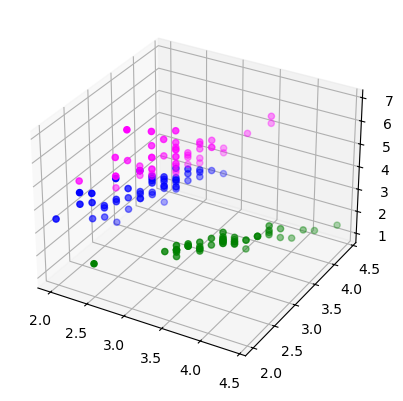

In [48]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

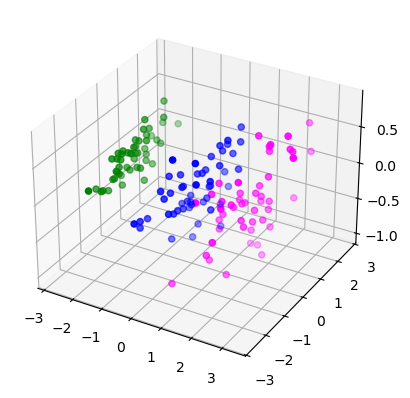

In [49]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [50]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [51]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

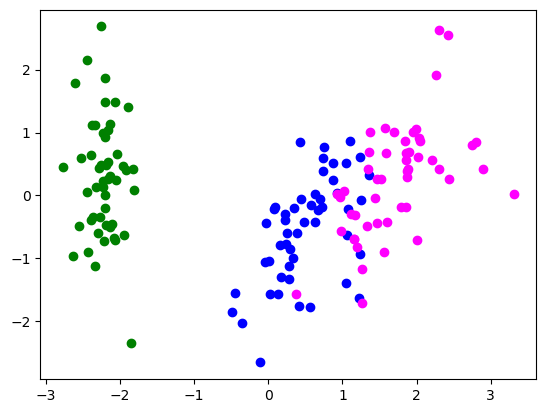

In [52]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0], Xpca[y==0,1], color='green')
plt.scatter(Xpca[y==1,0], Xpca[y==1,1], color='blue')
plt.scatter(Xpca[y==2,0], Xpca[y==2,1], color='magenta')
plt.show()

# KNN classifier

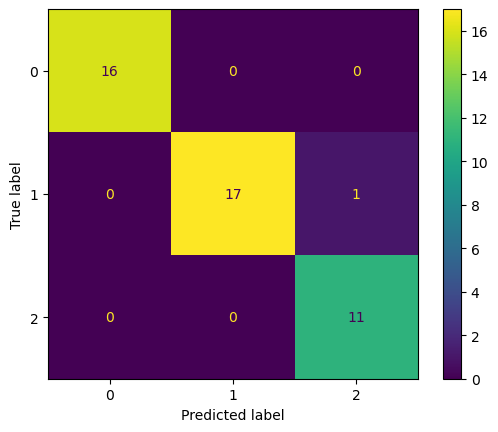

In [53]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X



from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)


knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(Xtrain, ytrain)


Ypred = knn1.predict(Xtest)

confusion_matrix(ytest, Ypred)
ConfusionMatrixDisplay.from_predictions(ytest, Ypred)



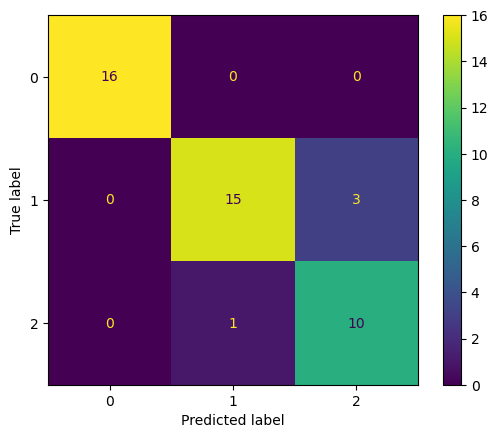

In [54]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Xpca2 = Xpca[:, :2]

Xtrain, Xtest, ytrain, ytest = train_test_split(Xpca2, y, test_size=0.3, random_state=0)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xtrain, ytrain)
Ypred = knn2.predict(Xtest)

confusion_matrix(ytest, Ypred)
ConfusionMatrixDisplay.from_predictions(ytest, Ypred)

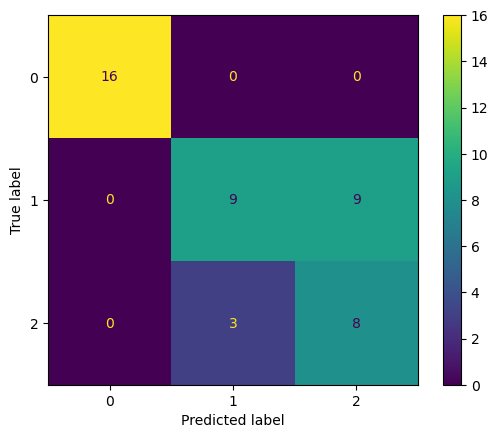

In [55]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X2 = X[:, :2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y, test_size=0.3, random_state=0)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(Xtrain, ytrain)
Ypred = knn3.predict(Xtest)

confusion_matrix(ytest, Ypred)
ConfusionMatrixDisplay.from_predictions(ytest, Ypred)